# Decision Trees for Classification

In this notebook, we learn how decision trees can solve classification problems and how they are constructed.

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import load_iris
from sklearn.tree import export_graphviz

In [2]:
# To install graphviz run: 
# ==> conda install python-graphviz
from graphviz import Source

## Decision Tree Classifier

So far, we have only used decision trees in the context of regression tasks. We will now learn how to apply decision trees to classification tasks. Classification is the process of finding a model (e.g., a decision tree) that is capable of dividing a dataset into different classes.

Scikit-Learn provides the class `DecisionTreeClassifier` for building decision trees that can solve classification tasks.

### Load sample dataset

In order to study how a decision tree classifier works, we need a sample dataset. We use the Iris Flower (dt. "Schwertlilie") dataset for this purpose.

The dataset consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

Our goal is to predict the species based on the sample features.

In [3]:
iris_db = load_iris(as_frame=True)
iris_df = iris_db.frame

In [4]:
print(iris_db.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
iris_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [7]:
# Check which classes are available and how many samples are available per class
# There should be three class with 50 samples in each class
print(iris_df.target.value_counts())

target
0    50
1    50
2    50
Name: count, dtype: int64


**According to the description and the `target_names` attribute, the class labels represent the following species:**

- Setosa
- Versicolour
- Virginica

### Train a simple decision tree classifier

In [8]:
x = iris_df[['petal length (cm)', 'petal width (cm)']].values
y = iris_df['target'].values

model = DecisionTreeClassifier(max_depth=2, random_state=42)

model.fit(x, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

### Visualize the decision tree

In [9]:
export_graphviz(
    model,
    out_file='iris_tree.dot',
    feature_names=["petal length (cm)", "petal width (cm)"],
    class_names=iris_db.target_names,
    rounded=True,
    filled=True
)

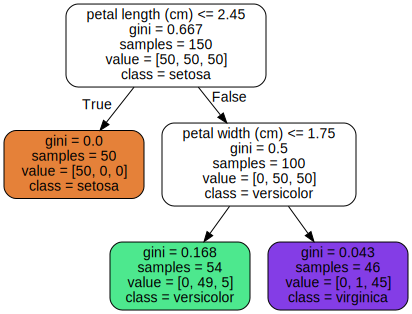

In [10]:
Source.from_file('iris_tree.dot')

A node's samples attribute counts how many training instances it applies to. For example, 100 training instances have a petal length greater than 2.45 cm (depth 1, right), among which 54 have a petal width smaller than 1.75 cm (depth 2, left). A node's value attribute tells you how many training instances of each class this node
applies to: for example, the bottom-right node applies to 0 Setosa, 1 Versicolor, and 45 Virginica. Finally, a node's **gini attribute measures its impurity**: a node is "pure" (gini=0) if all training instances it applies to belong to the same class. For example, since the depth-1 left node applies only to Setosa training
instances, it is pure and its gini score is 0. We will discuss this shortly.

### Visualization of the prediction boundaries

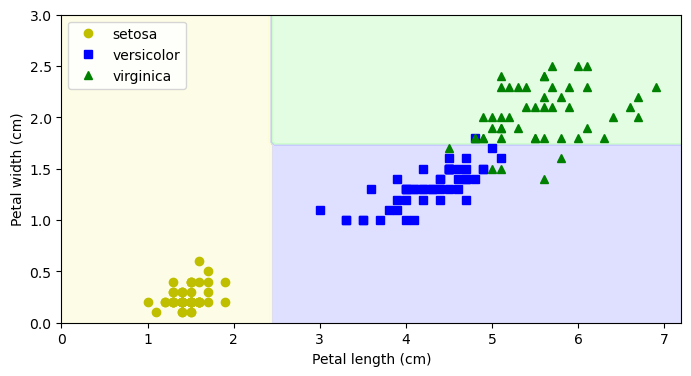

In [11]:
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])

plt.figure(figsize=(8, 4))

# Obtain testing samples by taking point on a regular-spaced grid 
lengths, widths = np.meshgrid(np.linspace(0, 7.2, 100), 
                              np.linspace(0, 3, 100))

# ravel() returns a flatten array. Unlike flatten(), it does not return a copy 
# of the original array
x_all = np.stack((lengths.ravel(), widths.ravel()), axis=1)

# Predict the class of each sample point
y_pred = model.predict(x_all).reshape(lengths.shape)

# Create a contour plot using the regular-spaced grid (+ the predict class)
plt.contourf(lengths, widths, y_pred, alpha=0.3, cmap=custom_cmap)

# Visualize the training samples (+ their class value)
for idx, (name, style) in enumerate(zip(iris_db.target_names, ("yo", "bs", "g^"))):
    plt.plot(x[:, 0][y == idx], x[:, 1][y == idx],
             style, label=f"{name}")

plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.axis([0, 7.2, 0, 3])
plt.legend()
plt.show()

### How to construct a decision tree for classification?

We have already introduced the **Classification And Regression Tree (CART)** algorithm when we learned how to construct a decision tree for regression. The construction of decision trees for a classification problem works in an analogous way. In other words, we also aim to split the dataset into two subsets using a single feature $k$ and a threshold $t_k$. These features should be chosen such that the weighted cost $C(k, t_k)$ is minimal.

$C(k, t_k) = \frac{n_{left}}{n} C_{left} + \frac{n_{right}}{n} C_{right}$

where $C_{left}$ and $C_{right}$ is some cost function computed on the left and right subset, $n_{left}$ and $n_{right}$ denotes the number of samples contained in the left and right subset, and $n$ denotes the total number of samples.


However, since we are dealing with a classification problem (which implies that our predicted value is categorical), we cannot use the MSE or MAE as a cost function. Instead, we need a metric that is able to deal with categorical values such as the **Gini Index** or **Entropy**.

#### Gini Index

The Gini index is a measure of diversity in a dataset. In other words, if we have a set in which all the elements are similar, this set has a low Gini index, and if all the elements are differ-
ent, it has a large Gini index. 

For clarity, consider the following two sets of 10 colored balls (where any two balls of the same color are indistinguishable):
    
- **Set 1**: eight red balls, two blue balls
- **Set 2**: four red balls, three blue balls, two yellow balls, one green ball
    
Set 1 looks more pure than set 2, because set 1 contains mostly red balls and a couple of blue
ones, whereas set 2 has many different colors. Next, we devise a measure of impurity that assigns a low value to set 1 and a high value to set 2. This measure of impurity relies on probability.

**Consider the following question:** <br/>
*If we pick two random elements of the set, what is the probability that they have a different
color? The two elements don't need to be distinct; we are allowed to pick the same element
twice.*

Let's calculate the probability for the given ball example. The probability of obtaining two balls with the same color is:

$P(\text{picking two balls of different color}) = 1 - P(\text{picking two balls of the same color})$


**Set 1:**
    
$P(\text{picking two balls of the same color} = P(\text{both balls are color 1}) + P(\text{both balls are color 2})$

$P(\text{both balls are color 1}) = (\frac{8}{10})^2 = 0.64$ <br/>
$P(\text{both balls are color 2}) = (\frac{2}{10})^2 = 0.04$

$P(\text{picking two balls of different colors}) = 1 - \big(0.64 + 0.04\big) = 0.32$

**Set 2:**
    
$P(\text{picking two balls of the same color} = P(\text{both balls are color 1}) + \text{...} + P(\text{both balls are color 4})$

$P(\text{both balls are color 1}) = (\frac{4}{10})^2 = 0.16$ <br/>
$P(\text{both balls are color 2}) = (\frac{3}{10})^2 = 0.09$
$P(\text{both balls are color 3}) = (\frac{2}{10})^2 = 0.04$
$P(\text{both balls are color 4}) = (\frac{1}{10})^2 = 0.01$


$P(\text{picking two balls of different colors}) = 1 - \big(0.16 + 0.09 + 0.04 + 0.01\big) = 0.7$

**Set 1 has a higher purity since we have a lower change of picking two balls of the same color!**

We refer the this metric as **Gini impurity index**. 

**More generally, the gini index is defined as follows:**

In a set with $m$ elements and $n$ classes, with $a_i$ elements belonging to the $i$-th class, the Gini impurity index is

$Gini = 1 - p_1^2 - p_2^2 - ... - p_n^2$ 

where $p_i=\frac{a_i}{m}$. This can be interpreted as the probability that if we pick two random elements out of the set, they belong to different classes.

**Note:** The Gini impurity index should not be confused with the Gini coefficient. The Gini coefficient is used in statistics to calculate the income or wealth inequality in countries.

**The following code illustrates how to compute the Gini impurity index:**

In [12]:
def gini_impurity(y):
    
    '''
    Calculate Gini impurity
    '''
    
    all_labels = np.unique(y)
    num_samples = len(y)
    
    gini = 1.
    for label in all_labels:
        gini -= ((y == label).sum() / num_samples) ** 2
        
    return gini

In [13]:
min_weighted_gini = np.inf
split_threshold = -1
split_feature_idx = -1

# Since each sample is described by two input features, we need to look for the
# best possible split in each dimension
for feature_idx in range(0, 2):
    
    x_feat = x[:, feature_idx]
    
    sort_idx = np.argsort(x_feat, axis=0)
    x_sorted = np.take_along_axis(x_feat, sort_idx, axis=0)
    y_sorted = np.take_along_axis(y, sort_idx, axis=0)
    
    for i in range(1, y.shape[0]):
        
        sort_idx = np.argsort(x, axis=0)

        # Get samples in left and right set
        y_left = y_sorted[:i]
        y_right = y_sorted[i:]

        # Number of samples in each set
        num_left = len(y_left)
        num_right = len(y_right)
        num_total = num_left + num_right

        # Compute GINI impurity for each set
        gini_left = gini_impurity(y_left)
        gini_right = gini_impurity(y_right)

        # Compute the weight sum of both gini impurities
        weighted_gini = num_left / num_total * gini_left + num_right / num_total * gini_right

        if weighted_gini < min_weighted_gini:
            min_weighted_gini = weighted_gini
            split_threshold = (x_sorted[i-1] + x_sorted[i]) / 2
            split_feature_idx = feature_idx

# Obtain the samples in the left and right child node
y_left = y[x[:, split_feature_idx] <= split_threshold]
y_right = y[x[:, split_feature_idx] > split_threshold]

print(f'Threshold: {split_threshold:.3f}')
print(f'Split Feature Idx: {split_feature_idx}')
print(f'Gini Impurity Root: {gini_impurity(y)}')
print(f'Gini Impurity Left: {gini_impurity(y_left)}')
print(f'Gini Impurity Right: {gini_impurity(y_right)}')

Threshold: 2.450
Split Feature Idx: 0
Gini Impurity Root: 0.6666666666666665
Gini Impurity Left: 0.0
Gini Impurity Right: 0.5


#### Entropy

Another measure of homogeneity in a set is **entropy**. It is is based on the physical concept of entropy and is highly important in probability and information theory. To understand entropy, we look at a slightly strange probability question. Consider the same two sets of colored balls as in the previous section, but think of the colors as an ordered set.

- **Set 1**: {red, red, red, red, red, red, red, red, blue, blue} (eight red balls, two blue balls)
- **Set 2**: {red, red, red, red, blue, blue, blue, yellow, yellow, green} (four red balls, three blue
balls, two yellow balls, one green ball)

Now, consider the following scenario: we have set 1 inside a bag, and we start picking balls out of
this bag and immediately return each ball we just picked back to the bag. We record the colors of
the balls we picked. 

If we do this 10 times, imagine that we get the following sequence:
- Red, red, red, blue, red, blue, blue, red, red, red

**Here is the main question that defines entropy:** <br/>
*What is the probability that, by following the procedure described in the previous paragraph, we get the exact sequence that defines set 1, which is {red, red, red, red, red, red, red, red, blue, blue}?*

This probability is not very large, because we must be really lucky to get this sequence. We have eight red balls and two blue balls, so the probability that we get a red ball $\frac{8}{10}$ and the probability that we get a blue ball is $\frac{2}{10}$. Because all the draws are independent, the probability that we get the desired sequence is

$P(r, r, r, r, r, r, r, r, b, b) = \big(\frac{8}{10}\big)^8 \cdot \big(\frac{2}{10}\big)^2 = 0.0067108864$ 

This is tiny, but can you imagine the corresponding probability for set 2? For set 2, we are picking
balls out of a bag with four red balls, three blue balls, two yellow balls, and one green ball and hoping to obtain the following sequence:

- Red, red, red, red, blue, blue, blue, yellow, yellow, green.

This is nearly impossible, because we have many colors and not many balls of each color. This
probability, which is calculated in a similar way, is

$P(r, r, r, r, b, b, b, y, y, g) = \big(\frac{4}{10}\big)^4 \cdot \big(\frac{3}{10}\big)^3 \cdot \big(\frac{2}{10}\big)^2 \cdot \big(\frac{1}{10}\big)^1 = 0.0000027648$

The more diverse the set, the more unlikely we'll be able to get the original sequence by picking
one ball at a time. In contrast, the most pure set, in which all balls are of the same color, is easy
to obtain this way.

Note that these numbers are very small for most cases. Imagine if our dataset had one million elements. We would be dealing with tremendously small numbers. When we have to deal with really small numbers, using logarithms is the best method, because they provide a convenient way to write small numbers.

**The entropy is defined as follows:** We start with the probability that we recover the initial sequence
by picking elements in our set, one at a time, with repetition. Then we take the logarithm, and
divide by the total number of elements in the set. Because decision trees deal with binary decisions,
we'll be using logarithms in base 2. The reason we took the negative of the logarithm is because
logarithms of very small numbers are all negative, so we multiply by $-1$ to turn it into a positive
number. Because we took a negative, the **more diverse the set, the higher the entropy**.

**Example: Entropy of Set 1:**
    
$Entropy = -\frac{1}{10} log_2 \Big( \big(\frac{8}{10}\big)^8 \big(\frac{2}{10}\big)^2 \Big)$ <br/>
$= -\frac{8}{10} log_2 \big(\frac{8}{10}\big) - \frac{2}{10} log_2 \big(\frac{2}{10}\big)$ <br/>
$= 0.722$

**Formal definition of entropy:**
    
    
In a set with $m$ elements and $n$ classes, with $a_i$ elements belonging to the $i$-th class, the entropy is

$Entropy = -p_1 log_2(p_1) - p_2 log_2(p_2) – ... – p_n log_2(p_n)$

where $p_i = \frac{a_i}{m}$

#### Entropy vs. Gini impurity

So should you use Gini impurity or entropy? The truth is, most of the time it does not make a big difference: they lead to similar trees. Gini impurity is slightly faster to compute, so it is a good default. However, when they differ, Gini impurity tends to isolate the most frequent class in its own branch of the tree, while entropy tends to produce slightly more balanced trees. See also https://sebastianraschka.com/faq/docs/decision-tree-binary.html

### What if we have categorical features?

So far, in all our decision tree examples, we have only worked with continuous input features. This raises the question of whether we can also process categorical input features. Yes, this is indeed possible, and we can even process non-binary categorical input features if we apply a simple trick.

**Binary categorical features:** Let's first assume we are given a dataset where each sample has a feature saying whether it's a cat or a dog. Since it's a binary feature, we assign each label a numeric class label that is either 0 or 1 depending on the label. When training a decision tree, the numeric labels are simply considered as continuous values. Consequently, the decision threshold that splits the samples into two subsets is 0.5. 

**Non-Binary categorical features:** Let's now assume we are given a dataset where each sample has a feature saying whether it's a cat, dog, or Bird. Obviously, this feature is not binary as there are three possible labels. However, we can convert the feature into several binary features using so-called **one-hot encoding**. In our example, one-hot encoding the feature would result in three distinct binary features encoding the "questions":
- Is the animal a dog?
- Is the animal a cat?
- Is the animal a bird?

Note that Scikit's provides the class `OneHotEncoder` which is able to produce a one-hot encoding of a given feature. 

In [61]:
encoder = OneHotEncoder()

samples = np.array([['Cat'], 
                    ['Dog'], 
                    ['Dog'], 
                    ['Bird']])

one_hot_encoded_samples = encoder.fit_transform(samples).toarray()

print('One-Hot Encoding: ', one_hot_encoded_samples)
print('Inverse One-Hot Encoding:', encoder.inverse_transform(one_hot_encoded_samples))

One-Hot Encoding:  [[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]]
Inverse One-Hot Encoding: [['Cat']
 ['Dog']
 ['Dog']
 ['Bird']]


## Instability

We have seen that decision trees are simple to understand and interpret, easy to use, versatile, and powerful.
However they do have a few limitations. First, as you may have noticed, Decision Trees love orthogonal decision boundaries (all splits are perpendicular to an axis), which makes them sensitive to training set rotation. For example, consider a simple linearly separable dataset: on the left, a Decision Tree can split it easily, while
on the right, after the dataset is rotated by 45°, the decision boundary looks unnecessarily convoluted. Although both Decision Trees fit the training set perfectly, it is very likely that the model on the right will not generalize well.

More generally, the main issue with Decision Trees is that they are very sensitive to small variations in the training data.

In [73]:
# Create a linearily separable dataset
np.random.seed(6)

x = np.random.rand(100, 2) - 0.5
y = (x[:, 0] > 0).astype(np.int64)

In [74]:
# Rotate the dataset

angle = np.pi / 4  # 45 degrees
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                            [np.sin(angle), np.cos(angle)]])
x_rot = x.dot(rotation_matrix)

In [75]:
def plot_decision_boundary(clf, X, y, axes, cmap):
    
    x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                         np.linspace(axes[2], axes[3], 100))
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=cmap)
    plt.contour(x1, x2, y_pred, cmap="Greys", alpha=0.8)
    colors = {"Wistia": ["#78785c", "#c47b27"], "Pastel1": ["red", "blue"]}
    markers = ("o", "^")
    
    for idx in (0, 1):
        plt.plot(X[:, 0][y == idx], X[:, 1][y == idx],
                 color=colors[cmap][idx], marker=markers[idx], linestyle="none")
    plt.axis(axes)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$", rotation=0)


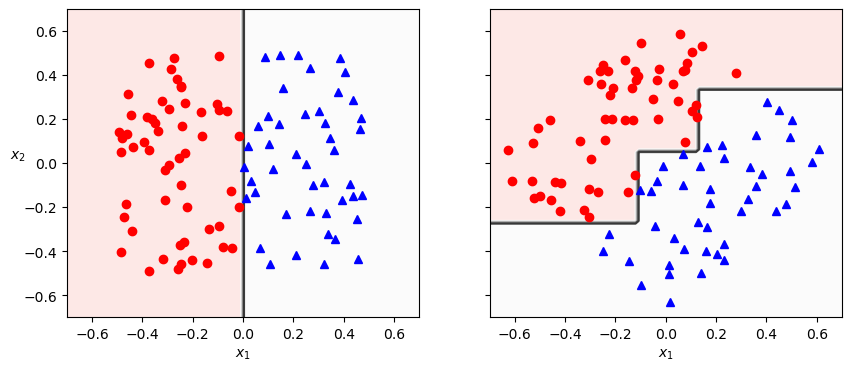

In [76]:
# Train a classifier to separate the two classes
model = DecisionTreeClassifier(random_state=42)
rot_model = DecisionTreeClassifier(random_state=42)

model.fit(x, y)
rot_model.fit(x_rot, y)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

# plt.sca(): Set the current Axes to ax and the current Figure to the parent of ax.
plt.sca(axes[0])
plot_decision_boundary(model, x, y,
                       axes=[-0.7, 0.7, -0.7, 0.7], cmap="Pastel1")

plt.sca(axes[1])
plot_decision_boundary(rot_model, x_rot, y,
                       axes=[-0.7, 0.7, -0.7, 0.7], cmap="Pastel1")
plt.ylabel("")

plt.show()